## CBOW 모델 구현

In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 507 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 508 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 509 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 510 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 511 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 512 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 513 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 514 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 515 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 516 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 517 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 518 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 519 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 520 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 521 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 522 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 523 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 524 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 525 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 526 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 527 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 528 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 529 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 530 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 531 |  반복 1

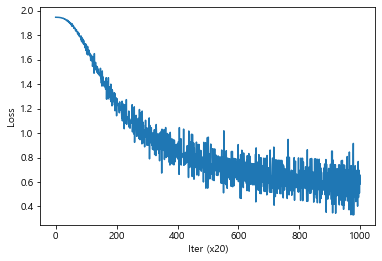

you [-1.1169115  1.2337612 -1.1223986 -1.1600474 -1.1812059]
say [ 1.1991255  -0.00264966  1.1955684   1.1845491   1.1702476 ]
goodbye [-0.754728    0.7807206  -0.7677572  -0.7650044  -0.70599353]
and [ 1.0238606 -1.8648618  1.0573491  1.0351803  1.0215176]
i [-0.7689812   0.77775586 -0.77253187 -0.755709   -0.69920355]
hello [-1.1219913  1.2522413 -1.1062561 -1.1323245 -1.1888595]
. [1.0494576  1.6311973  1.0192659  0.9974966  0.97770214]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])